In [1]:
%load_ext autoreload
%autoreload 2
from app.evaluation import print_boolean_matrix, get_accuracy_and_plot_confusion
import pandas as pd
from app.training import get_undersample_df
from app.classifier import normalize, EnsembleAllNumeric
from app.constants import VALIDATION_DATA_PATH, TRAINING_DATA_PATH

In [2]:
df = normalize(get_undersample_df(pd.read_csv(TRAINING_DATA_PATH)))
y = df.pop("label")
val_df = normalize(pd.read_csv(VALIDATION_DATA_PATH))
y_val = val_df.pop("label")

In [3]:
clf = EnsembleAllNumeric()
clf.fit(df, y)

In [4]:
predicted = clf.predict(val_df)
print_boolean_matrix(y_val, predicted)

\begin{table}[h]
\centering
\caption{Boolean Matrix}
\label{boolean_matrix}
\begin{tabular}{|r|r|r|r|r|}
 \hline
Label & Predicted Correctly & Predicted Incorrectly & Precision & Recall \\ \hline
WEB & 4 & 0 & 0.13 & 1.00 \\ \hline
DOCS & 0 & 4 & 0.00 & 0.00 \\ \hline
HW & 0 & 5 & 0.00 & 0.00 \\ \hline
DEV & 0 & 11 & 0.00 & 0.00 \\ \hline
EDU & 0 & 4 & 0.00 & 0.00 \\ \hline
DATA & 0 & 3 & 0.00 & 0.00 \\ \hline
\multicolumn{3}{|l|}{Weighted Average} & 0.02 & 0.13 \\ \hline
\end{tabular}
\end{table}


/home/madness/Documents/Projects/git_better/venv2/local/lib/python2.7/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/madness/Documents/Projects/git_better/venv2/local/lib/python2.7/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [5]:
print list(y_val)
print predicted

['HW', 'HW', 'EDU', 'EDU', 'DEV', 'WEB', 'EDU', 'DOCS', 'DOCS', 'DATA', 'DEV', 'HW', 'DEV', 'DEV', 'HW', 'DEV', 'DOCS', 'DEV', 'EDU', 'DEV', 'DEV', 'WEB', 'HW', 'DATA', 'DATA', 'WEB', 'DEV', 'DEV', 'WEB', 'DEV', 'DOCS']
['WEB' 'WEB' 'WEB' 'WEB' 'WEB' 'WEB' 'WEB' 'WEB' 'WEB' 'WEB' 'WEB' 'WEB'
 'WEB' 'WEB' 'WEB' 'WEB' 'WEB' 'WEB' 'WEB' 'WEB' 'WEB' 'WEB' 'WEB' 'WEB'
 'WEB' 'WEB' 'WEB' 'WEB' 'WEB' 'WEB' 'WEB']


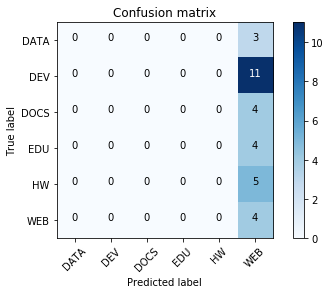

0.12903225806451613

In [6]:
get_accuracy_and_plot_confusion(y_val, predicted, clf.clf.classes_)